# Esercizio 5

#### Hydrogen atom
<span style="color:blue">
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1

<span style="color:blue">
Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?</span>

I due grafici seguenti mostrano gli scatterplot dei campionamenti di numeri casuali distribuiti secondo le distribuzioni di probabilità date dalle 2 funzioni d'onda di singola particella nei due autostati a n=1 e n=2, con n numero quantico fondamentale

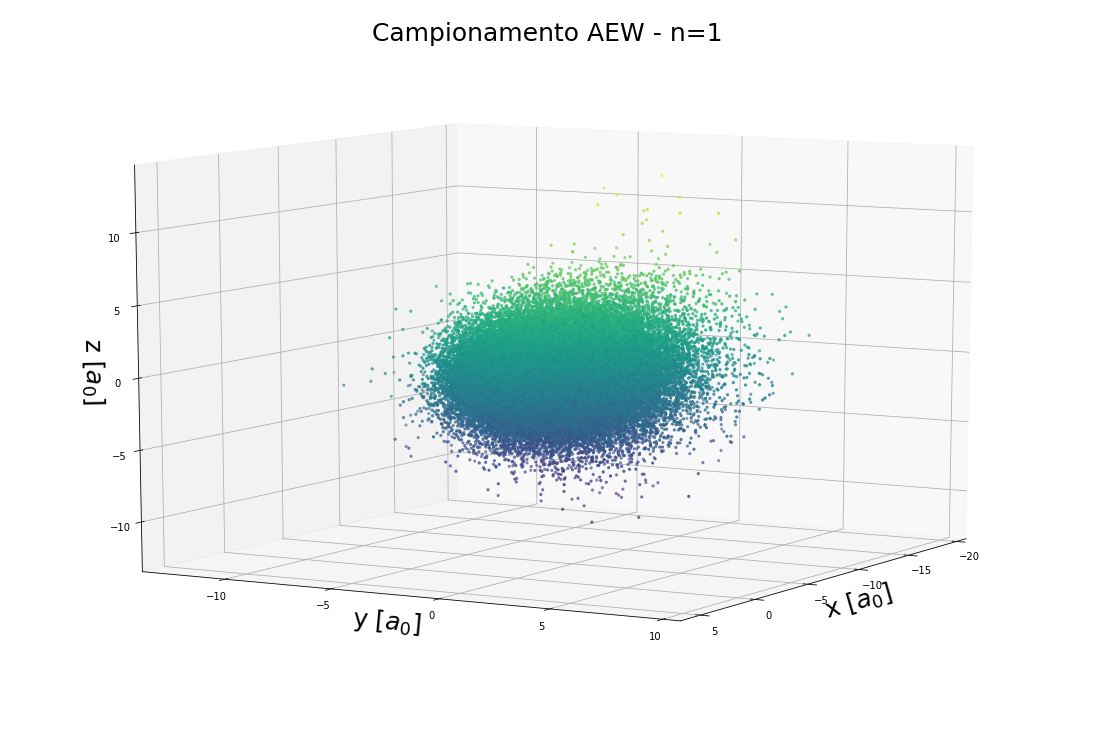

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

file=open("5_1/es5_1_N1_unif.dat")
sum=0
for line in file:
    sum+=1
file.close()

X, Y, Z = np.loadtxt("5_1/es5_1_N1_unif.dat", usecols=(0,1,2), unpack='true')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Campionamento AEW - n=1', fontsize=25)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x [$a_0$]', fontsize=25)
ax.set_ylabel('y [$a_0$]', fontsize=25)
ax.set_zlabel('z [$a_0$]', fontsize=25)
ax.view_init(10, 30)
plt.show()

<Figure size 1080x720 with 0 Axes>

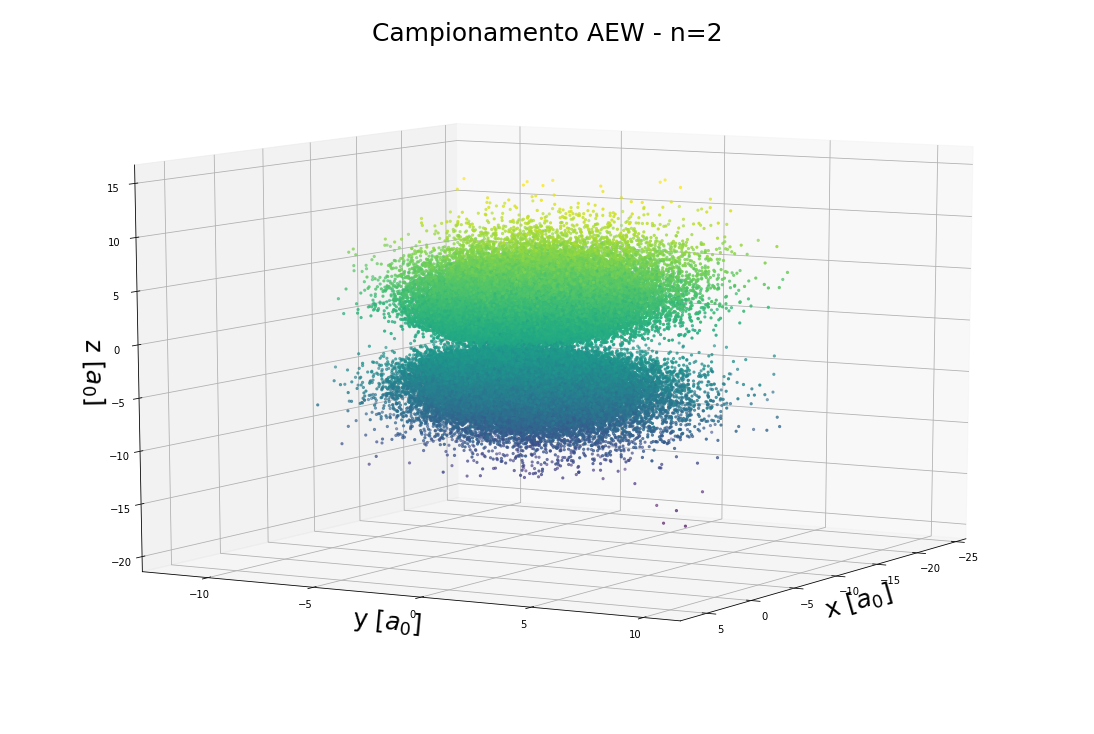

In [2]:
file=open("5_1/es5_1_N2_unif.dat")
sum=0
for line in file:
    sum+=1
file.close()

X2, Y2, Z2 = np.loadtxt("5_1/es5_1_N2_unif.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(15,10))

fig = plt.figure(figsize=(15,10))
fig.suptitle('Campionamento AEW - n=2', fontsize=25)
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x [$a_0$]', fontsize=25)
ax.set_ylabel('y [$a_0$]', fontsize=25)
ax.set_zlabel('z [$a_0$]', fontsize=25)
ax.view_init(10, 30)
plt.show()

Analizziamo ora la distanza media dal centro delle particelle campionate per entrambe le funzioni d'onda. In questo caso la probabilità di transizione 'tentativo' T(x|y) è distibuita uniformemente

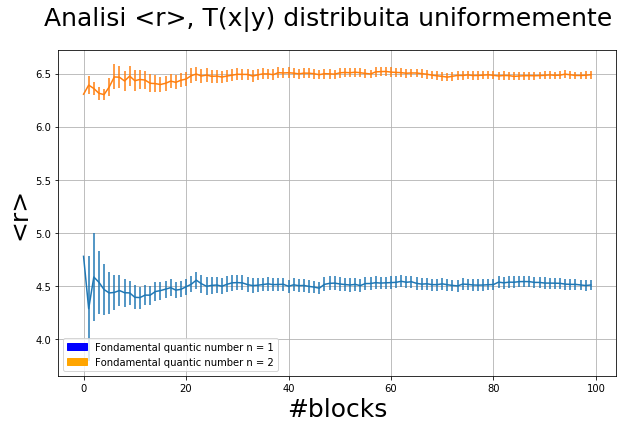

Il valor medio di r nel caso di n = 1 è:  4.50884 +- 0.0494084  m/a0
Il valor medio di r nel caso di n = 2 è:  6.48938 +- 0.0358628  m/a0


In [14]:
import matplotlib.patches as mpatches

file=open("5_1/es5_1_R1_unif.dat")
sum=0
for line in file:
    sum+=1
file.close()

mean1, error1 = np.loadtxt("5_1/es5_1_R1_unif.dat", usecols=(0,1), unpack='true')
mean2, error2 = np.loadtxt("5_1/es5_1_R2_unif.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,6))
plt.suptitle('Analisi <r>, T(x|y) distribuita uniformemente', fontsize=25)
x=np.arange(sum)
plt.errorbar(x,mean1,yerr=error1)
plt.errorbar(x,mean2,yerr=error2)
plt.xlabel('#blocks', fontsize =25)
plt.ylabel('<r>',fontsize=25)
plt.grid(True)
blue_patch = mpatches.Patch(color='blue', label='Fondamental quantic number n = 1')
orange_patch = mpatches.Patch(color='orange', label='Fondamental quantic number n = 2')
plt.legend(handles=[blue_patch,orange_patch])
plt.show()
print('Il valor medio di r nel caso di n = 1 è: ', mean1[sum-1], '+-', error1[sum-1],' m/a0')
print('Il valor medio di r nel caso di n = 2 è: ', mean2[sum-1], '+-', error2[sum-1],' m/a0')

Prendendo invece una T(x|y) distribuita normalmente otteniamo:

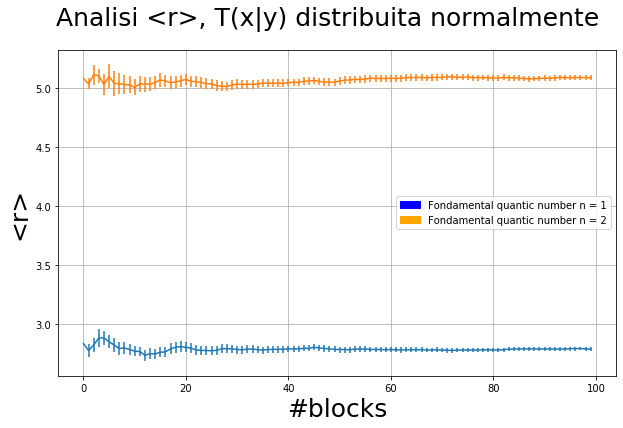

Il valor medio di r nel caso di n = 1 è:  2.78541 +- 0.0165194  m/a0
Il valor medio di r nel caso di n = 2 è:  5.08947 +- 0.0220218  m/a0


In [15]:
file=open("5_1/es5_1_R1_norm.dat")
sum=0
for line in file:
    sum+=1
file.close()

mean1_gauss, error1_gauss = np.loadtxt("5_1/es5_1_R1_norm.dat", usecols=(0,1), unpack='true')
mean2_gauss, error2_gauss = np.loadtxt("5_1/es5_1_R2_norm.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,6))
plt.suptitle('Analisi <r>, T(x|y) distribuita normalmente', fontsize=25)
x=np.arange(sum)
plt.errorbar(x,mean1_gauss,yerr=error1_gauss)
plt.errorbar(x,mean2_gauss,yerr=error2_gauss)
plt.xlabel('#blocks', fontsize=25)
plt.ylabel('<r>', fontsize=25)
plt.grid(True)
blue_patch = mpatches.Patch(color='blue', label='Fondamental quantic number n = 1')
orange_patch = mpatches.Patch(color='orange', label='Fondamental quantic number n = 2')
plt.legend(handles=[blue_patch,orange_patch])
plt.show()
print('Il valor medio di r nel caso di n = 1 è: ', mean1_gauss[sum-1], '+-', error1_gauss[sum-1],' m/a0')
print('Il valor medio di r nel caso di n = 2 è: ', mean2_gauss[sum-1], '+-', error2_gauss[sum-1],' m/a0')

Si può quindi notare come, variando la probabilità di transizione da un punto all'altro del random walk, vari la distribuzione stessa dei punti nello spazio e di conseguenza il valor medio dell'osservabile r. Una probabilità T(x|y) distribuita normalmente porta a risultati in miglior accordo con i valori teorici di $<r>$

Di seguito sono mostrati i due scatterplot e l'analisi del raggio medio dei precedenti sistemi dove però il punto iniziale del random walk è preso molto distante dal centro (in questo caso nel punto O(30,30,30) inunità di a0). Si può notare come, anche prendendo il punto O molto distante dall'origine del sistemadi riferimento, l'algoritmo funziona in egual modo ed in egual tempo, restituendo gli stessi valori medi dell'osservabile r

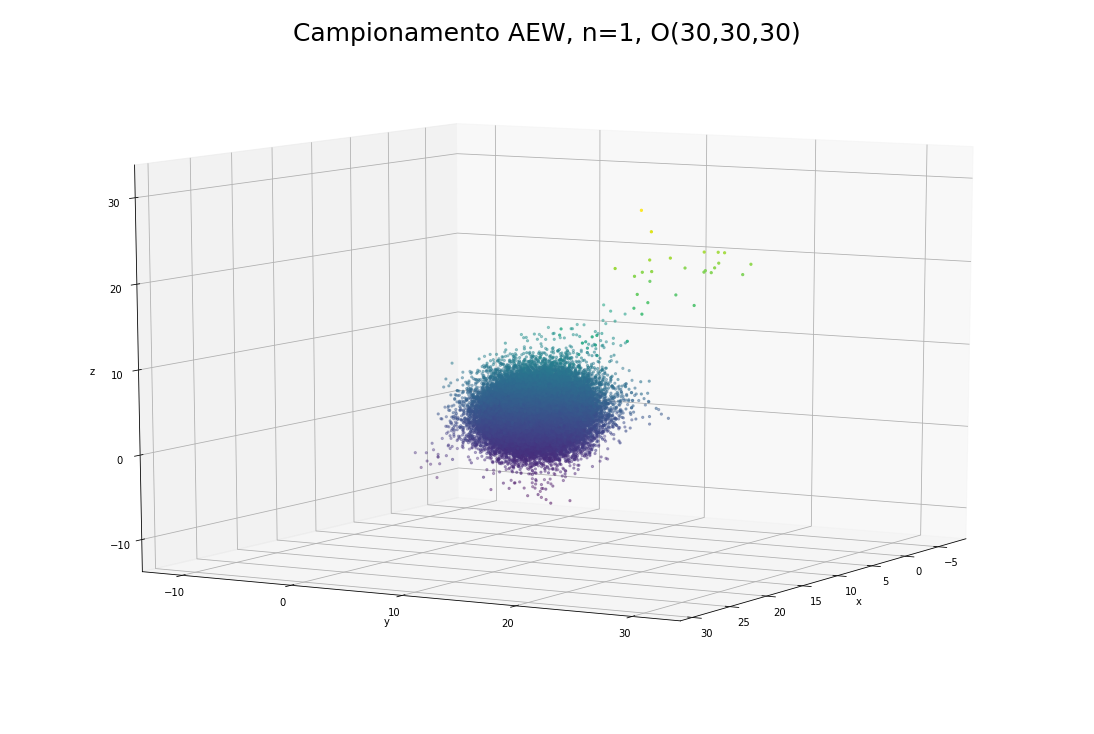

In [17]:
file=open("5_1/es5_1_N1_norm_30.dat")
sum=0
for line in file:
    sum+=1
file.close()

X1_20, Y1_20, Z1_20 = np.loadtxt("5_1/es5_1_N1_norm_30.dat", usecols=(0,1,2), unpack='true')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Campionamento AEW, n=1, O(30,30,30)', fontsize=25)
ax = Axes3D(fig)
ax.scatter(X1_20, Y1_20, Z1_20, c=Z1_20, marker='.')
ax.set_xlabel('x', fontsize =10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z',fontsize=10)
ax.view_init(10, 30)
plt.show()

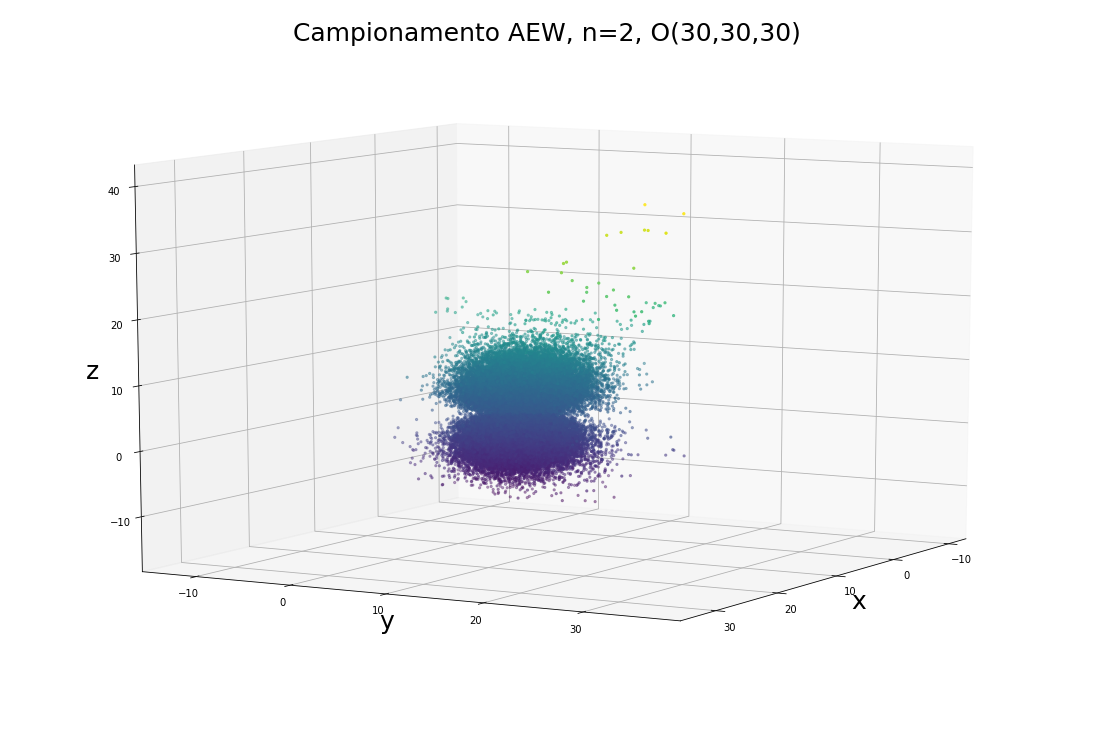

In [18]:
file=open("5_1/es5_1_N2_norm_30.dat")
sum=0
for line in file:
    sum+=1
file.close()

X2_20, Y2_20, Z2_20 = np.loadtxt("5_1/es5_1_N2_norm_30.dat", usecols=(0,1,2), unpack='true')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Campionamento AEW, n=2, O(30,30,30)', fontsize=25)
ax = Axes3D(fig)
ax.scatter(X2_20, Y2_20, Z2_20, c=Z2_20, marker='.')
ax.set_xlabel('x', fontsize =25)
ax.set_ylabel('y', fontsize=25)
ax.set_zlabel('z',fontsize=25)
ax.view_init(10, 30)
plt.show()

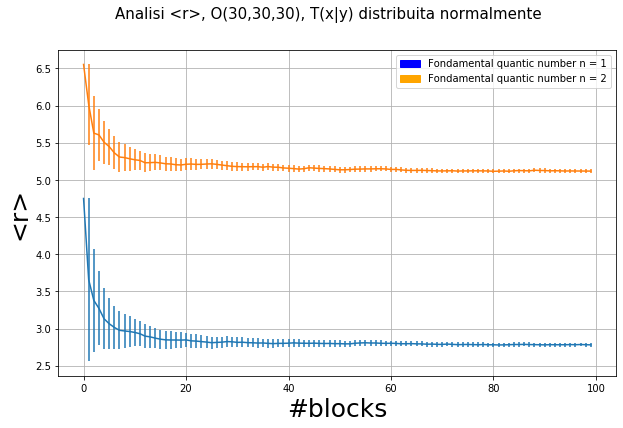

Il valor medio di r nel caso di n = 1 è:  2.7803 +- 0.0253314  m/a0
Il valor medio di r nel caso di n = 2 è:  5.11822 +- 0.0259215  m/a0


In [20]:
file=open("5_1/es5_1_R1_norm_30.dat")
sum=0
for line in file:
    sum+=1
file.close()

mean1_20, error1_20 = np.loadtxt("5_1/es5_1_R1_norm_30.dat", usecols=(0,1), unpack='true')
mean2_20, error2_20 = np.loadtxt("5_1/es5_1_R2_norm_30.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,6))
plt.suptitle('Analisi <r>, O(30,30,30), T(x|y) distribuita normalmente', fontsize=15)
x=np.arange(sum)
plt.errorbar(x,mean1_20,yerr=error1_20)
plt.errorbar(x,mean2_20,yerr=error2_20)
plt.xlabel('#blocks', fontsize=25)
plt.ylabel('<r>', fontsize=25)
plt.grid(True)
blue_patch = mpatches.Patch(color='blue', label='Fondamental quantic number n = 1')
orange_patch = mpatches.Patch(color='orange', label='Fondamental quantic number n = 2')
plt.legend(handles=[blue_patch,orange_patch])
plt.show()
print('Il valor medio di r nel caso di n = 1 è: ', mean1_20[sum-1], '+-', error1_20[sum-1],' m/a0')
print('Il valor medio di r nel caso di n = 2 è: ', mean2_20[sum-1], '+-', error2_20[sum-1],' m/a0')

Da ultimo, un piccolo accorgimento sul numero di steps dell'algoritmo di Metropolis in ogni blocco al fine di stimare le incertezze statistiche: poichè l'algoritmo tende ad essere esatto per Nsteps che tende ad infinito, è necessario che il numero di steps scelti sia molto elevato: ho pertanto scelto di produrre 100 blocchi da 1000 punti ciascuno